## How do GDP and public expenditure on education relate to selected educational outcomes in Brazil, Colombia and Peru from 2002 to 2020, specifically in terms of illiteracy rates, population with 13 years or more of education, and economic activity participation among the population with 13 years or more of education?

In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

db_file_path = r"C:\Users\canbe\OneDrive\Masaüstü\education-and-americas\data\educationAndEconomy_BrazilColombiaPeru.db"

conn = sqlite3.connect(db_file_path)
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

dataframes = []
for table in tables:
    table_name = table[0]
    df = pd.read_sql_query(f"SELECT * FROM {table_name};", conn)
    dataframes.append(df)

combined_df = pd.concat(dataframes, axis=1)

if 'Year' in combined_df.columns:
    combined_df = combined_df.loc[:,~combined_df.columns.duplicated()]

combined_df['Year'] = combined_df['Year'].astype(int)

conn.close()

In [4]:
def sort_columns(df, country_prefix):
    gdp_col = f'{country_prefix}_GDP'
    eap_col = f'{country_prefix}_EconomicActivityParticipation'
    other_cols = sorted([col for col in df.columns if col.startswith(country_prefix) and col not in [gdp_col, eap_col]])
    return [gdp_col, eap_col] + other_cols

brazil_sorted_columns = sort_columns(combined_df, 'Brazil')
colombia_sorted_columns = sort_columns(combined_df, 'Colombia')
peru_sorted_columns = sort_columns(combined_df, 'Peru')

sorted_columns = ['Year'] + brazil_sorted_columns + colombia_sorted_columns + peru_sorted_columns
sorted_combined_df = combined_df[sorted_columns]

sorted_combined_df.columns


Index(['Year', 'Brazil_GDP', 'Brazil_EconomicActivityParticipation',
       'Brazil_IlliteracyRates', 'Brazil_PublicExpenditure',
       'Brazil_YearsOfEducation', 'Colombia_GDP',
       'Colombia_EconomicActivityParticipation', 'Colombia_IlliteracyRates',
       'Colombia_PublicExpenditure', 'Colombia_YearsOfEducation', 'Peru_GDP',
       'Peru_EconomicActivityParticipation', 'Peru_IlliteracyRates',
       'Peru_PublicExpenditure', 'Peru_YearsOfEducation'],
      dtype='object')

In [5]:
brazil_columns = ['Year', 'Brazil_GDP', 'Brazil_PublicExpenditure', 'Brazil_EconomicActivityParticipation', 'Brazil_IlliteracyRates', 'Brazil_YearsOfEducation']
brazil_df = combined_df[brazil_columns]

colombia_columns = ['Year', 'Colombia_GDP', 'Colombia_PublicExpenditure', 'Colombia_EconomicActivityParticipation', 'Colombia_IlliteracyRates', 'Colombia_YearsOfEducation']
colombia_df = combined_df[colombia_columns]

peru_columns = ['Year', 'Peru_GDP', 'Peru_PublicExpenditure', 'Peru_EconomicActivityParticipation', 'Peru_IlliteracyRates', 'Peru_YearsOfEducation']
peru_df = combined_df[peru_columns]

# Brazil

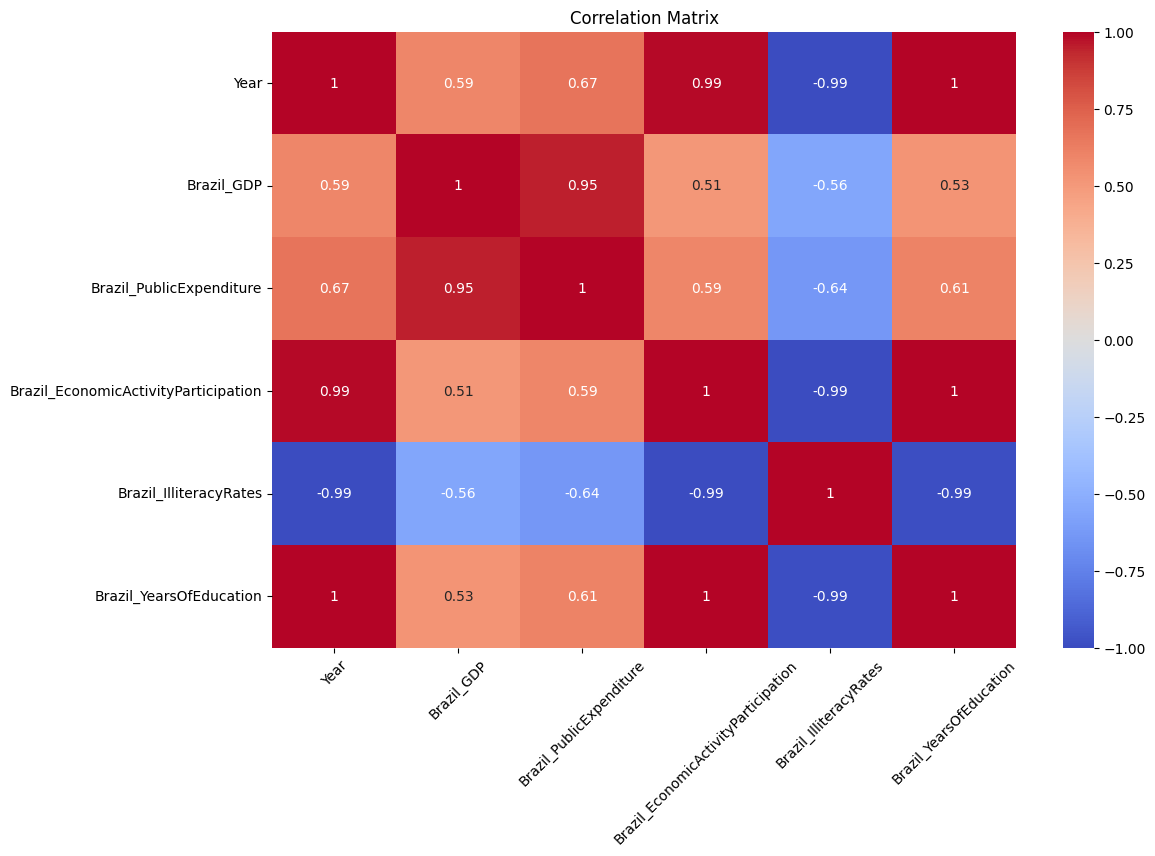

In [83]:
correlation_matrix = brazil_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.show()

# Colombia

In [73]:
colombia_df

,Year,Colombia_GDP,Colombia_PublicExpenditure,Colombia_EconomicActivityParticipation,Colombia_IlliteracyRates,Colombia_YearsOfEducation
0,2002,2421.162104,15.30206,14.500000,7.6,11.700000
1,2003,2305.170507,15.53950,15.400000,7.5,12.600000
2,2004,2811.459451,15.41742,16.100000,7.0,13.100000
3,2005,3448.538323,15.53145,16.900000,6.9,13.600000
4,2006,3782.603496,13.77132,18.033333,6.8,14.433333
5,2007,4762.083069,14.49817,19.166667,6.7,15.266667
6,2008,5534.689447,13.85491,20.300000,6.6,16.100000
7,2009,5245.951585,15.45088,19.000000,6.8,15.400000
8,2010,6392.758026,15.92683,19.800000,6.9,16.100000
9,2011,7392.943598,14.77203,20.600000,6.7,16.800000


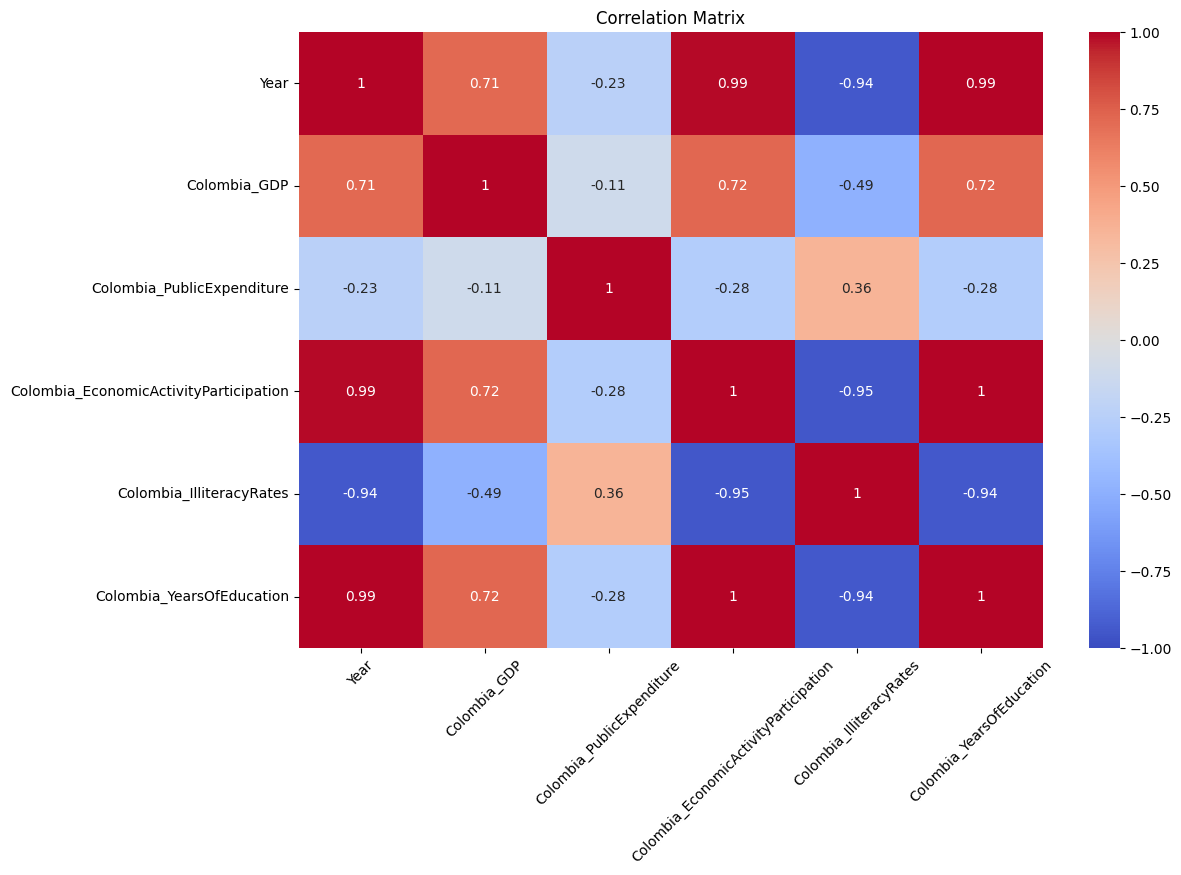

In [84]:
correlation_matrix = colombia_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.show()

# Peru

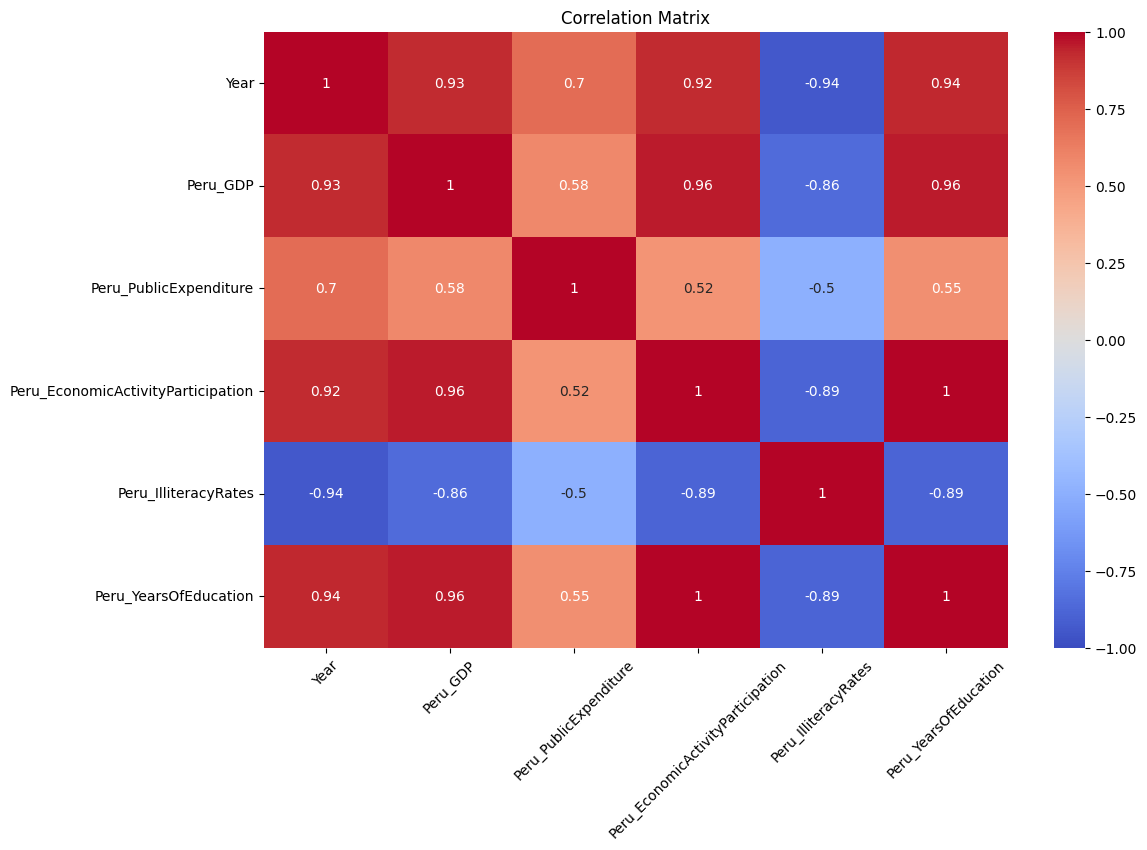

In [85]:
correlation_matrix = peru_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.show()

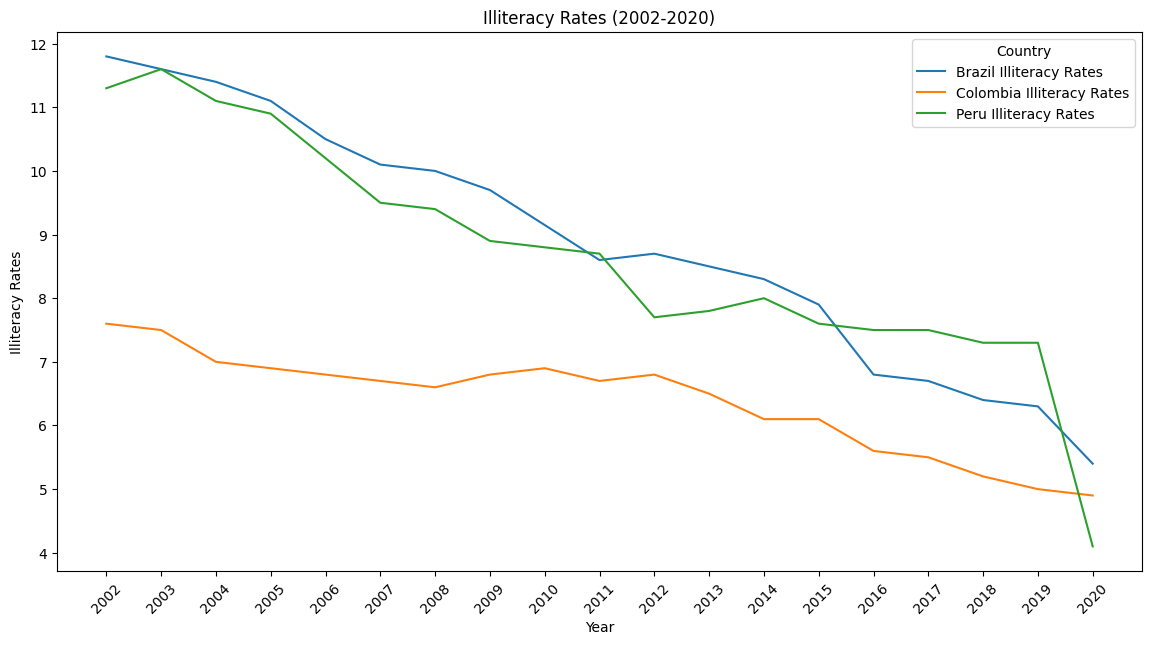

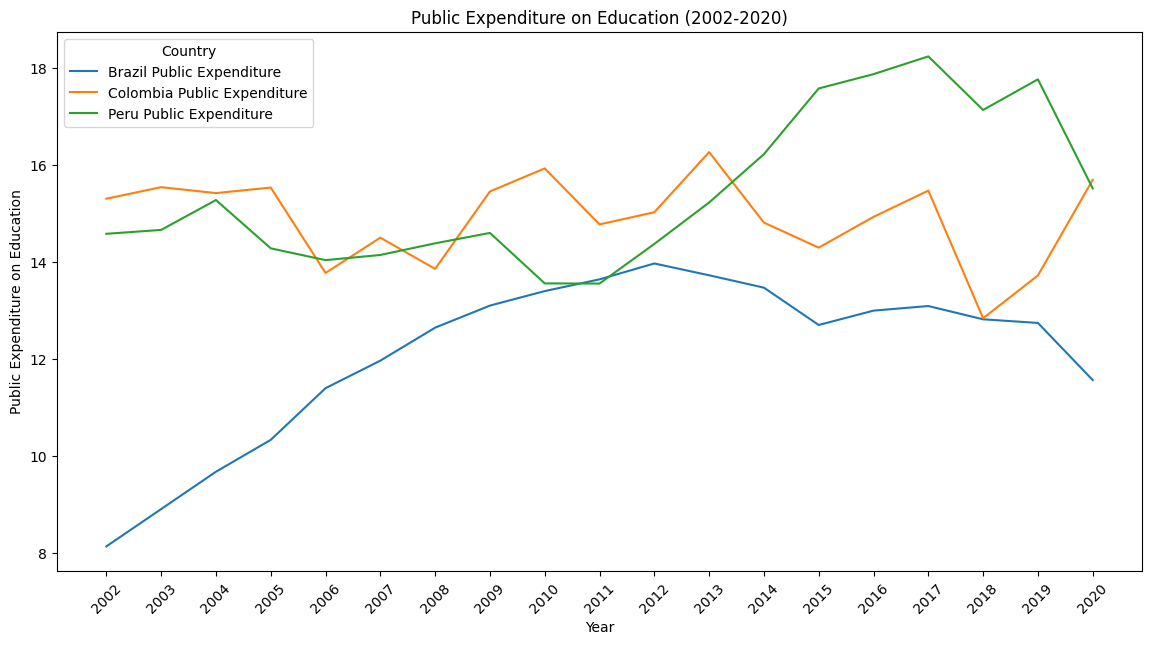

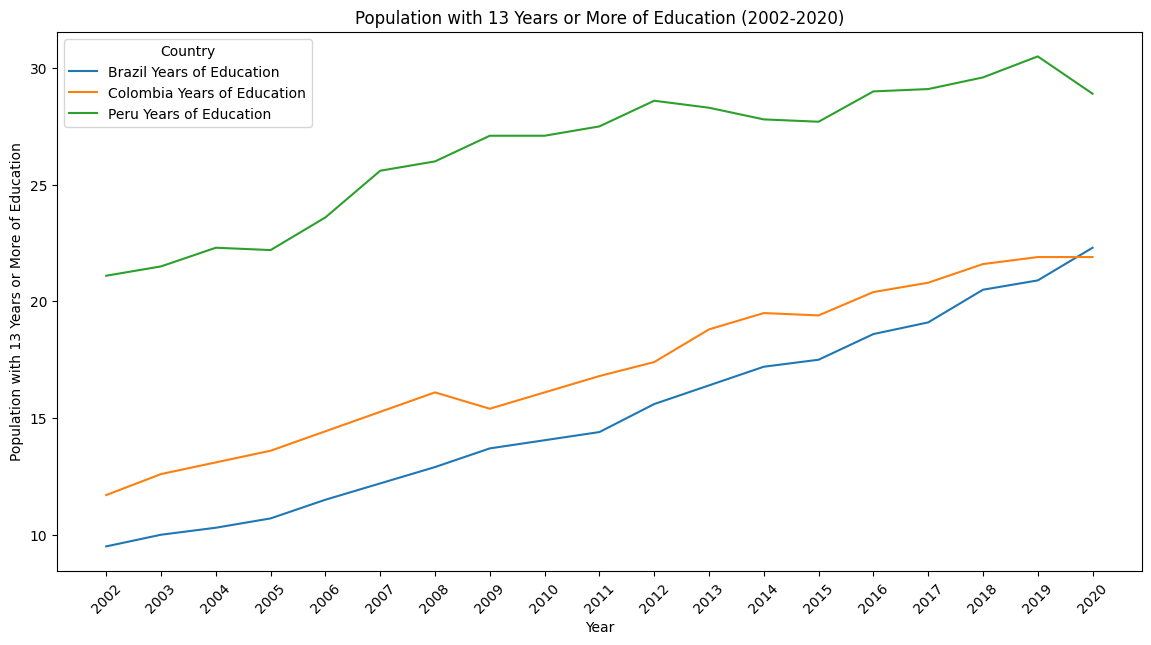

In [57]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=combined_df, x='Year', y='Brazil_IlliteracyRates', label='Brazil Illiteracy Rates')
sns.lineplot(data=combined_df, x='Year', y='Colombia_IlliteracyRates', label='Colombia Illiteracy Rates')
sns.lineplot(data=combined_df, x='Year', y='Peru_IlliteracyRates', label='Peru Illiteracy Rates')
plt.title('Illiteracy Rates (2002-2020)')
plt.xlabel('Year')
plt.ylabel('Illiteracy Rates')
plt.xticks(ticks=combined_df['Year'].unique(), labels=combined_df['Year'].unique(), rotation=45)
plt.legend(title='Country')
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(data=combined_df, x='Year', y='Brazil_PublicExpenditure', label='Brazil Public Expenditure')
sns.lineplot(data=combined_df, x='Year', y='Colombia_PublicExpenditure', label='Colombia Public Expenditure')
sns.lineplot(data=combined_df, x='Year', y='Peru_PublicExpenditure', label='Peru Public Expenditure')
plt.title('Public Expenditure on Education (2002-2020)')
plt.xlabel('Year')
plt.ylabel('Public Expenditure on Education')
plt.xticks(ticks=combined_df['Year'].unique(), labels=combined_df['Year'].unique(), rotation=45)
plt.legend(title='Country')
plt.show()



plt.figure(figsize=(14, 7))
sns.lineplot(data=combined_df, x='Year', y='Brazil_YearsOfEducation', label='Brazil Years of Education')
sns.lineplot(data=combined_df, x='Year', y='Colombia_YearsOfEducation', label='Colombia Years of Education')
sns.lineplot(data=combined_df, x='Year', y='Peru_YearsOfEducation', label='Peru Years of Education')
plt.title('Population with 13 Years or More of Education (2002-2020)')
plt.xlabel('Year')
plt.ylabel('Population with 13 Years or More of Education')
plt.xticks(ticks=combined_df['Year'].unique(), labels=combined_df['Year'].unique(), rotation=45)
plt.legend(title='Country')
plt.show()

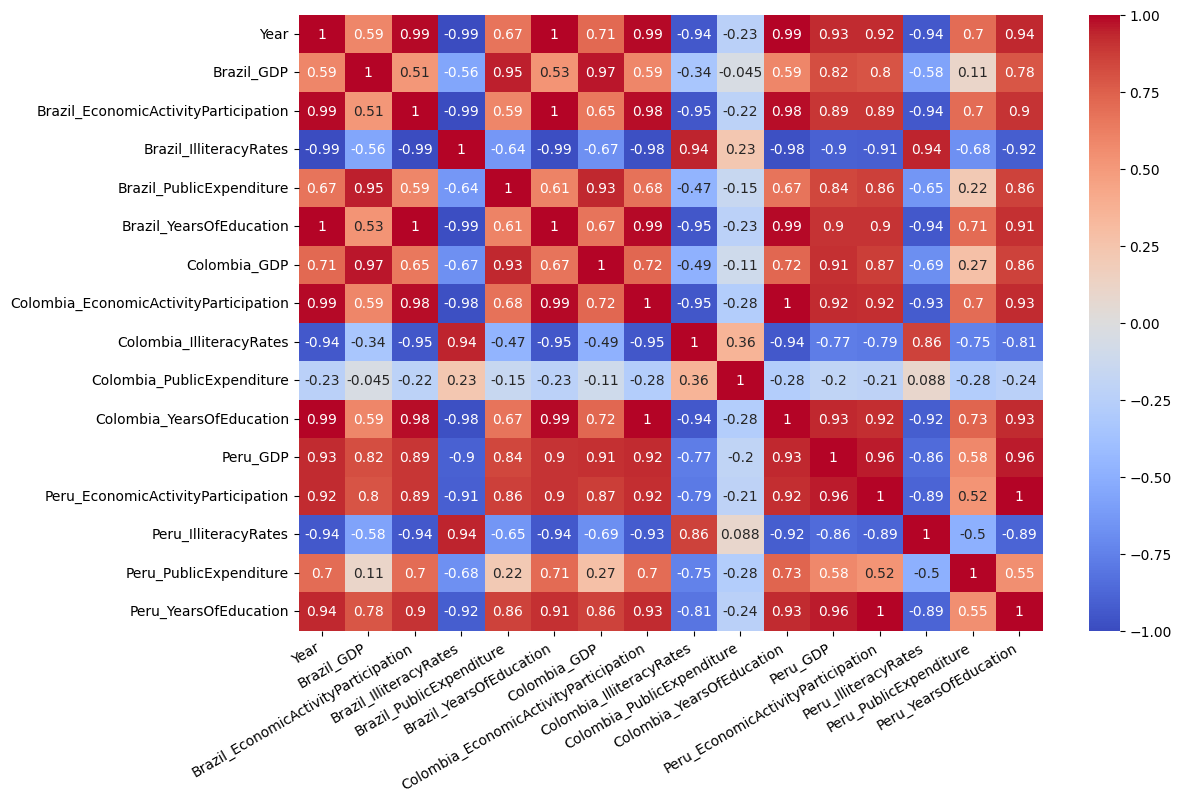

In [133]:
correlation_matrix = sorted_combined_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(rotation=30, ha='right')
plt.show()

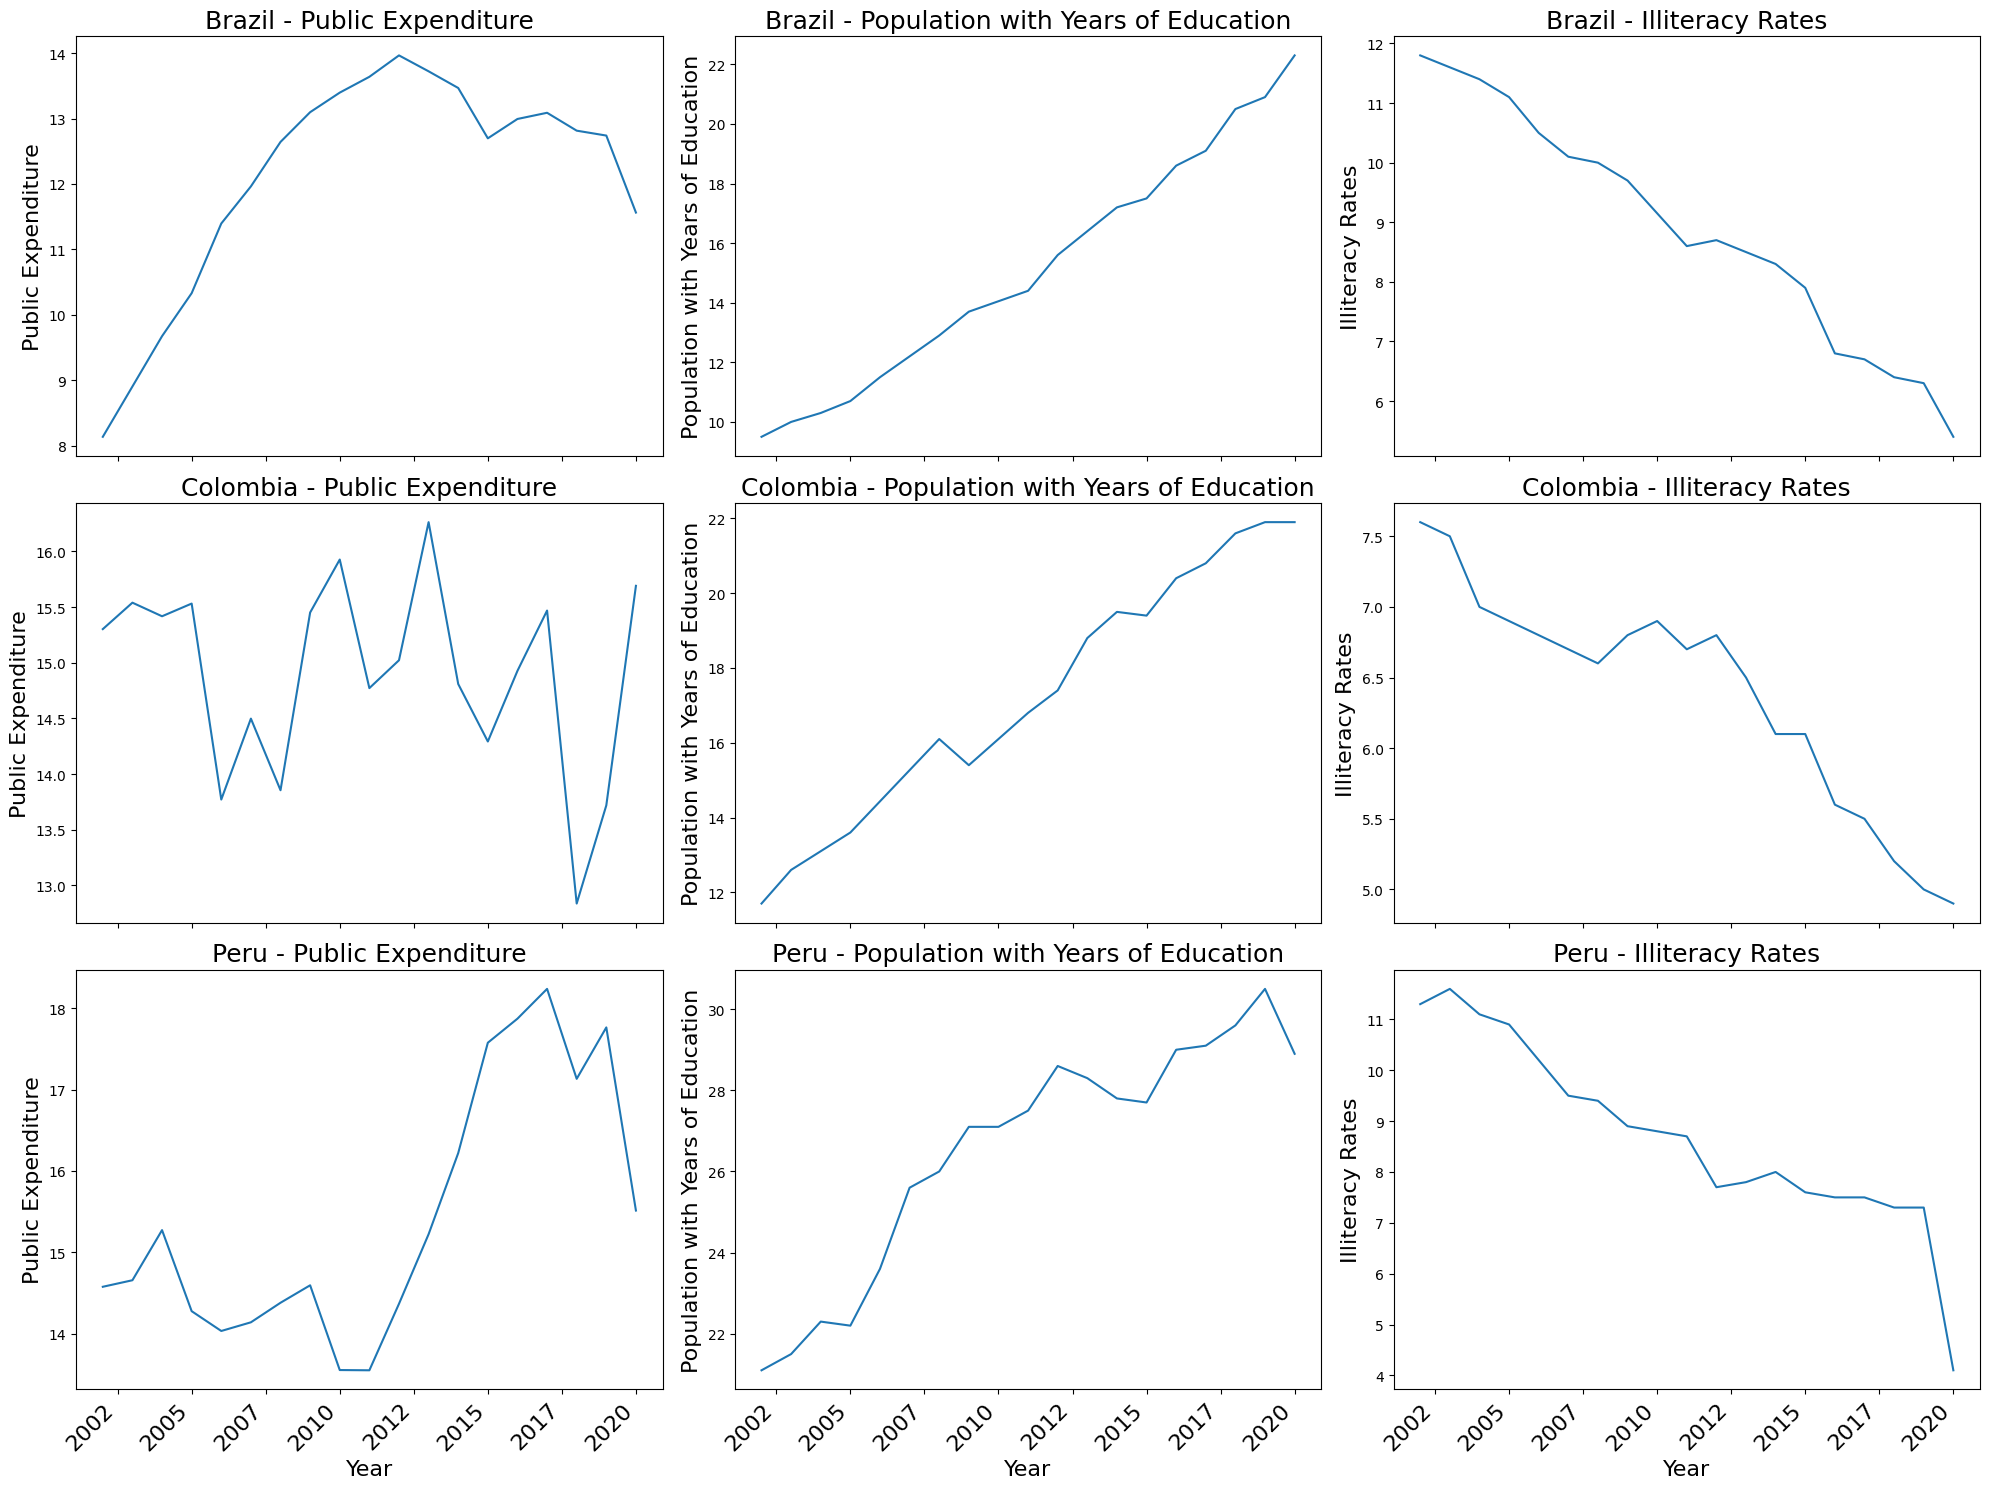

In [115]:
from matplotlib.ticker import FuncFormatter

fig, axes = plt.subplots(3, 3, figsize=(20, 15), sharex=True)

countries = ['Brazil', 'Colombia', 'Peru']
metrics = ['Public Expenditure', 'Years Of Education', 'Illiteracy Rates']

for i, country in enumerate(countries):
    for j, metric in enumerate(metrics):
        column_name = f'{country}_{metric.replace(" ", "")}'
        sns.lineplot(data=combined_df, x='Year', y=column_name, ax=axes[i, j])
        if metric == 'Years Of Education':
            metric = 'Population with Years of Education'
        axes[i, j].set_title(f'{country} - {metric}', fontsize=18)
        axes[i, j].set_xlabel('Year', fontsize=16)
        axes[i, j].set_ylabel(metric, fontsize=16)
        axes[i, j].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))
        plt.setp(axes[i, j].get_xticklabels(), rotation=45, ha='right', fontsize=16)
        plt.setp(axes[i, j].get_yticklabels(), fontsize=10)

plt.tight_layout()
plt.show()

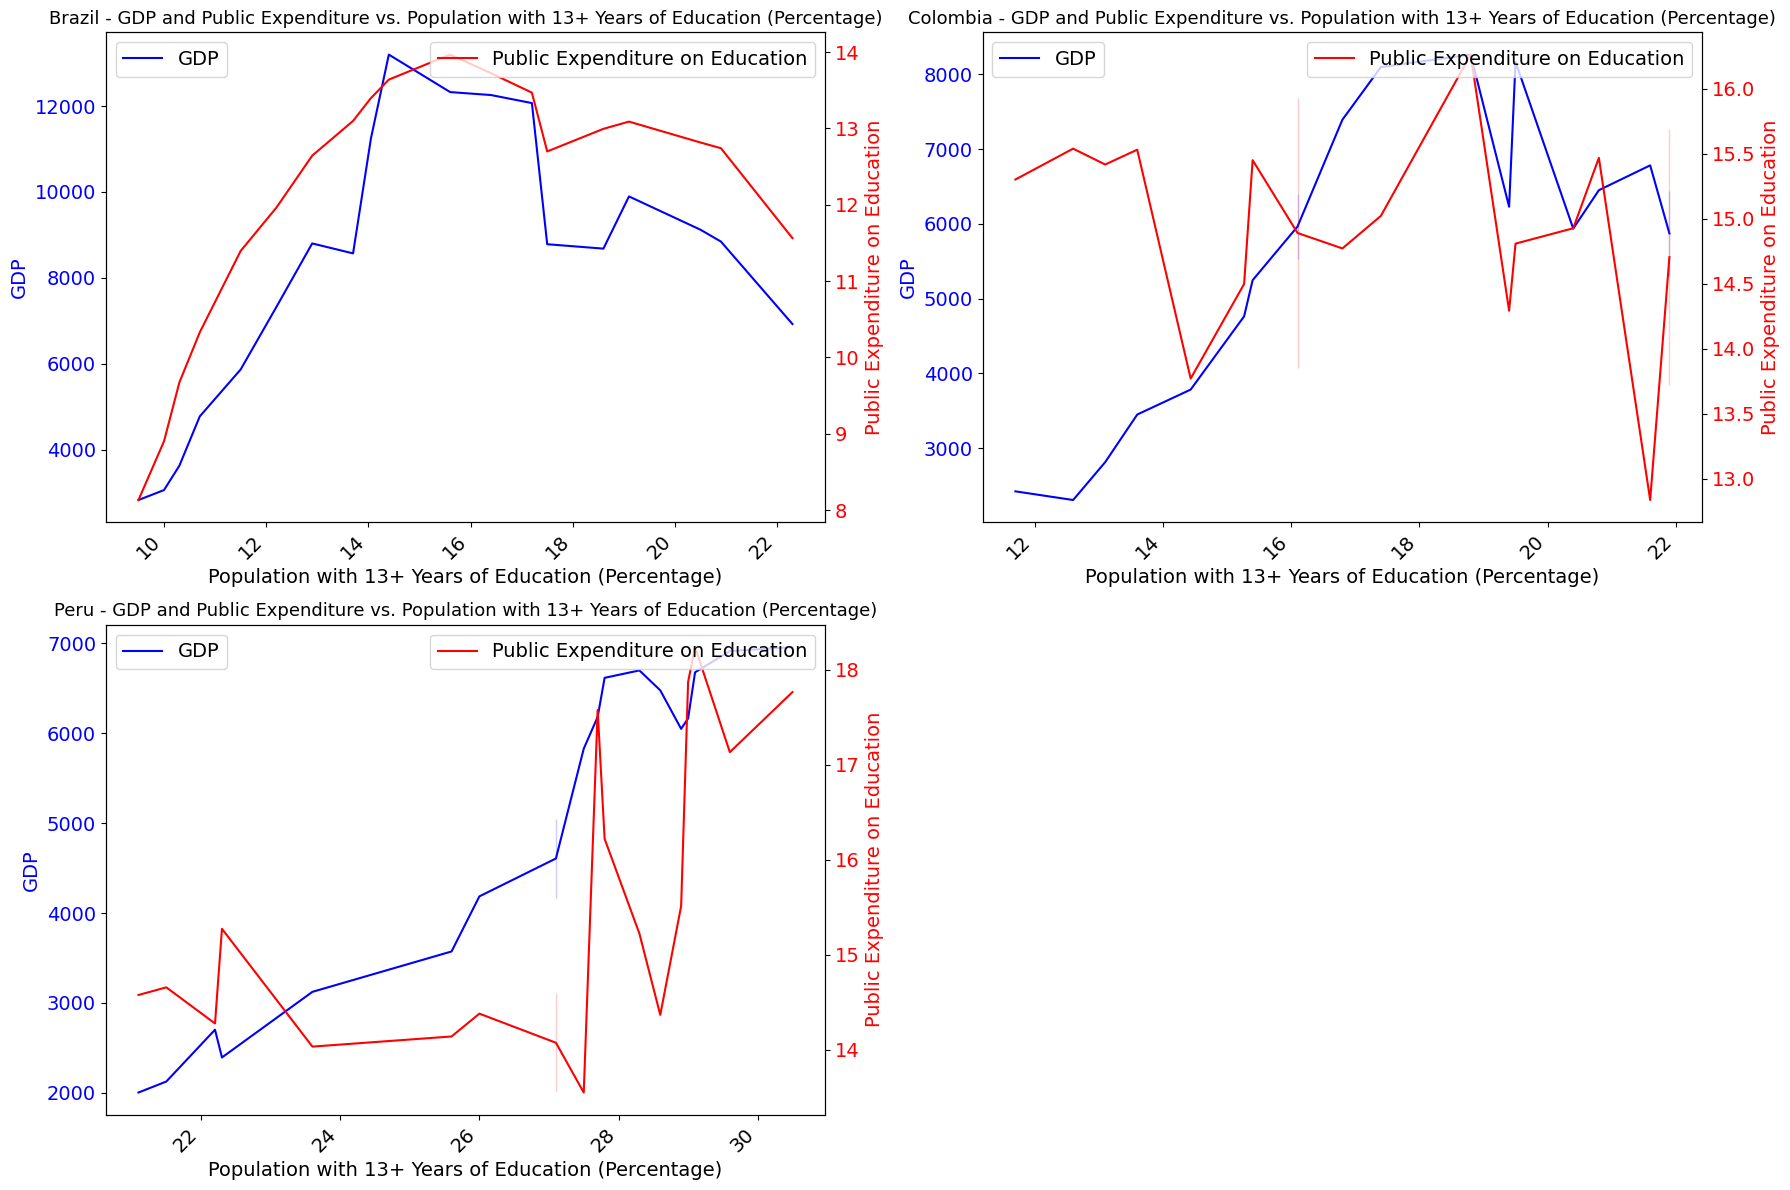

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12), sharex=False)

countries = ['Brazil', 'Colombia', 'Peru']

for i, country in enumerate(countries):
    if i < 2:
        ax1 = axes[0, i]
    else:
        ax1 = axes[1, 0]
    ax2 = ax1.twinx()
    
    sns.lineplot(data=combined_df, x=f'{country}_YearsOfEducation', y=f'{country}_GDP', ax=ax1, color='b', label='GDP')
    sns.lineplot(data=combined_df, x=f'{country}_YearsOfEducation', y=f'{country}_PublicExpenditure', ax=ax2, color='r', label='Public Expenditure on Education')
    
    ax1.set_title(f'{country} - GDP and Public Expenditure vs. Population with 13+ Years of Education (Percentage)', fontsize=13)
    ax1.set_xlabel('Population with 13+ Years of Education (Percentage)', fontsize=14)
    ax1.set_ylabel('GDP', fontsize=14, color='b')
    ax2.set_ylabel('Public Expenditure on Education', fontsize=14, color='r')
    
    ax1.tick_params(axis='y', labelcolor='b')
    ax2.tick_params(axis='y', labelcolor='r')
    
    ax1.legend(loc='upper left', fontsize=14)
    ax2.legend(loc='upper right', fontsize=14)
    
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=14)
    plt.setp(ax1.get_yticklabels(), fontsize=14)
    plt.setp(ax2.get_yticklabels(), fontsize=14)

fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()